## Bibliotecas Utilizadas


In [7]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

## Definições do Sistema


In [17]:
'''definicao sigmoid_f'''
def sigmoid_f(x):
    return 1/(1+np.exp(-x))

def hs_(W,X):
    dot = np.matmul(W,X)
    return sigmoid_f(dot)
    

def Hs(W,X):
    out = np.zeros((3,))
    v = np.matmul(W,X)
    '''Implementacao com sigmoid_f'''
    y = sigmoid_f(v)
    aux = y*(1-y)
    
    out[0] = X[0] * aux
    out[1] = X[1] * aux
    out[2] = X[2] * aux
    return out

error
 [[-0.00191032]
 [-0.00155961]
 [ 0.00127311]
 [ 0.0015595 ]]
h
 [[0.00191032]
 [0.00155961]
 [0.99872689]
 [0.9984405 ]]


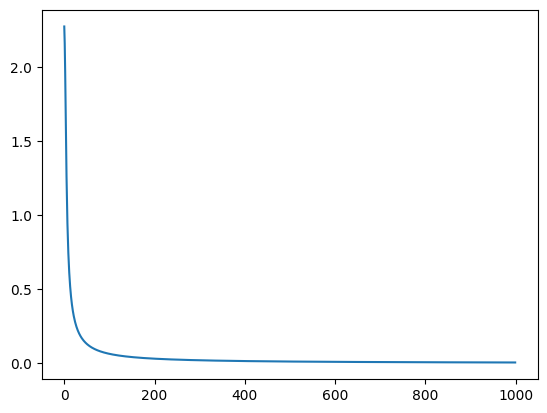

In [29]:

'''Declaracao de Entrada e Saida Esperada'''
X = np.array([[0, 0, 1],
              [0, 1, 1],
              [1, 0, 1],
              [1, 1, 1]])


D = np.array([[0, 0, 0, 1]]).T #AND
# D = np.array([[0, 1, 1, 1]]).T #OR
# D = np.array([[0, 0, 1, 1]]).T #X 

'''XOR - nao é possivel treinar com uma camada'''
# D = np.array([[0, 1, 1, 0]]).T #XOR


'''Initial Conditions'''
W = 2*np.random.random((1,3)) - 1 
N = 1000
cost = np.zeros((N,))
t = np.arange(N)


ns = W.shape[1]
nd = D.shape[0]
s = W.T
P = 0.01* np.eye(ns)
R = 1.0 * np.eye(nd)
Q = 1.0 * np.eye(ns)

H = np.zeros((nd, ns))
h = np.zeros((nd, 1))
for i in range(N):
    '''Predict'''
    sp = s
    Pp = P + Q
    
    '''Update'''
    z = D 

    for k in range(nd):
        H[k,:] =  Hs(s.T,X[k,:].reshape(ns,1))
        h[k,:] = hs_(s.T,X[k,:].reshape(ns,1))
        # print("H = ", H[k,:])
        # print("h = ", h[k,:])
        
    error = z - h 
    A = np.matmul(H, np.matmul(P,H.T)) + R

    '''Calculo Ganho de Kalman(K)'''
    inv_A = inv(A)
    K = np.matmul(Pp, np.matmul(H.T, inv_A))

    s = sp + np.matmul(K, error)
    P = np.matmul(np.eye(ns) - np.matmul(K,H), Pp)
    cost[i] = np.sum(np.abs(error))
print("error\n",error)
print('h\n', h)
plt.figure()
plt.plot(t, cost)
plt.show()